In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from plotly.offline import init_notebook_mode, iplot 
import plotly.graph_objs as go
import plotly.offline as py
import pycountry
py.init_notebook_mode(connected=True)
import os
nfl_data = pd.read_csv("./superbowl.csv")
nfl_data['Year'] = pd.to_datetime(nfl_data['Date'])
nfl_data['Year'] = nfl_data['Year'].dt.year
nfl_data.shape

(54, 11)

In [2]:
nfl_data.head(5)

,Date,SB,Winner,Winner Pts,Loser,Loser Pts,MVP,Stadium,City,State,Year
0,Feb 2 2020,LIV (54),Kansas City Chiefs,31,San Francisco 49ers,20,Patrick Mahomes,Hard Rock Stadium,Miami Gardens,Florida,2020
1,Feb 3 2019,LIII (53),New England Patriots,13,Los Angeles Rams,3,Julian Edelman,Mercedes-Benz Stadium,Atlanta,Georgia,2019
2,Feb 4 2018,LII (52),Philadelphia Eagles,41,New England Patriots,33,Nick Foles,U.S. Bank Stadium,Minneapolis,Minnesota,2018
3,Feb 5 2017,LI (51),New England Patriots,34,Atlanta Falcons,28,Tom Brady,NRG Stadium,Houston,Texas,2017
4,Feb 7 2016,50,Denver Broncos,24,Carolina Panthers,10,Von Miller,Levi's Stadium,Santa Clara,California,2016


In [3]:
import plotly.graph_objects as go
rb2=nfl_data.State.value_counts()
rbg2=rb2.reset_index()
rbg2.rename(columns={'index':'State', 'State': 'num of played match'}, inplace=True)
rbg2.set_index('State', inplace=True)
r30=rbg2.rename( index={'Florida':"FL", 'California': "CA","Louisiana": "LA", "Texas":"TX","Arizona": "AZ" ,
                        "Georgia":"GA", "Michigan":"MI", "Minnesota":"MN","Indiana":"IN", "New Jersey":"NJ" })
final=r30.reset_index()
fig = go.Figure(data=go.Choropleth(
    locations=final['State'],
    z = final['num of played match'].astype(float), 
    locationmode = 'USA-states',
    colorscale = 'Blues',
))

fig.update_layout(
    title_text = 'Total matches played in each state',
    geo_scope='usa', 
)
fig.show()

In [4]:
state = nfl_data.groupby('State').count()
state.sort_values(by = 'Date', ascending = False, inplace = True)

city = nfl_data.groupby('City').count()
city.sort_values(by = 'Date', ascending = False, inplace = True)

city = go.Pie(labels=city.index,values=city['Date'],name="City",hole=0.4,domain={'x': [0,0.46]})
state = go.Pie(labels=state.index,values=state['Date'],name="State",hole=0.5,domain={'x': [0.52,1]})

layout = dict(title = 'Matches played in Cities And State', font=dict(size=10), legend=dict(orientation="h"),
              annotations = [dict(x=0.2, y=0.5, text='City', showarrow=False, font=dict(size=20)),
                             dict(x=0.8, y=0.5, text='State', showarrow=False, font=dict(size=20)) ])

fig = dict(data=[city, state], layout=layout)
py.iplot(fig)

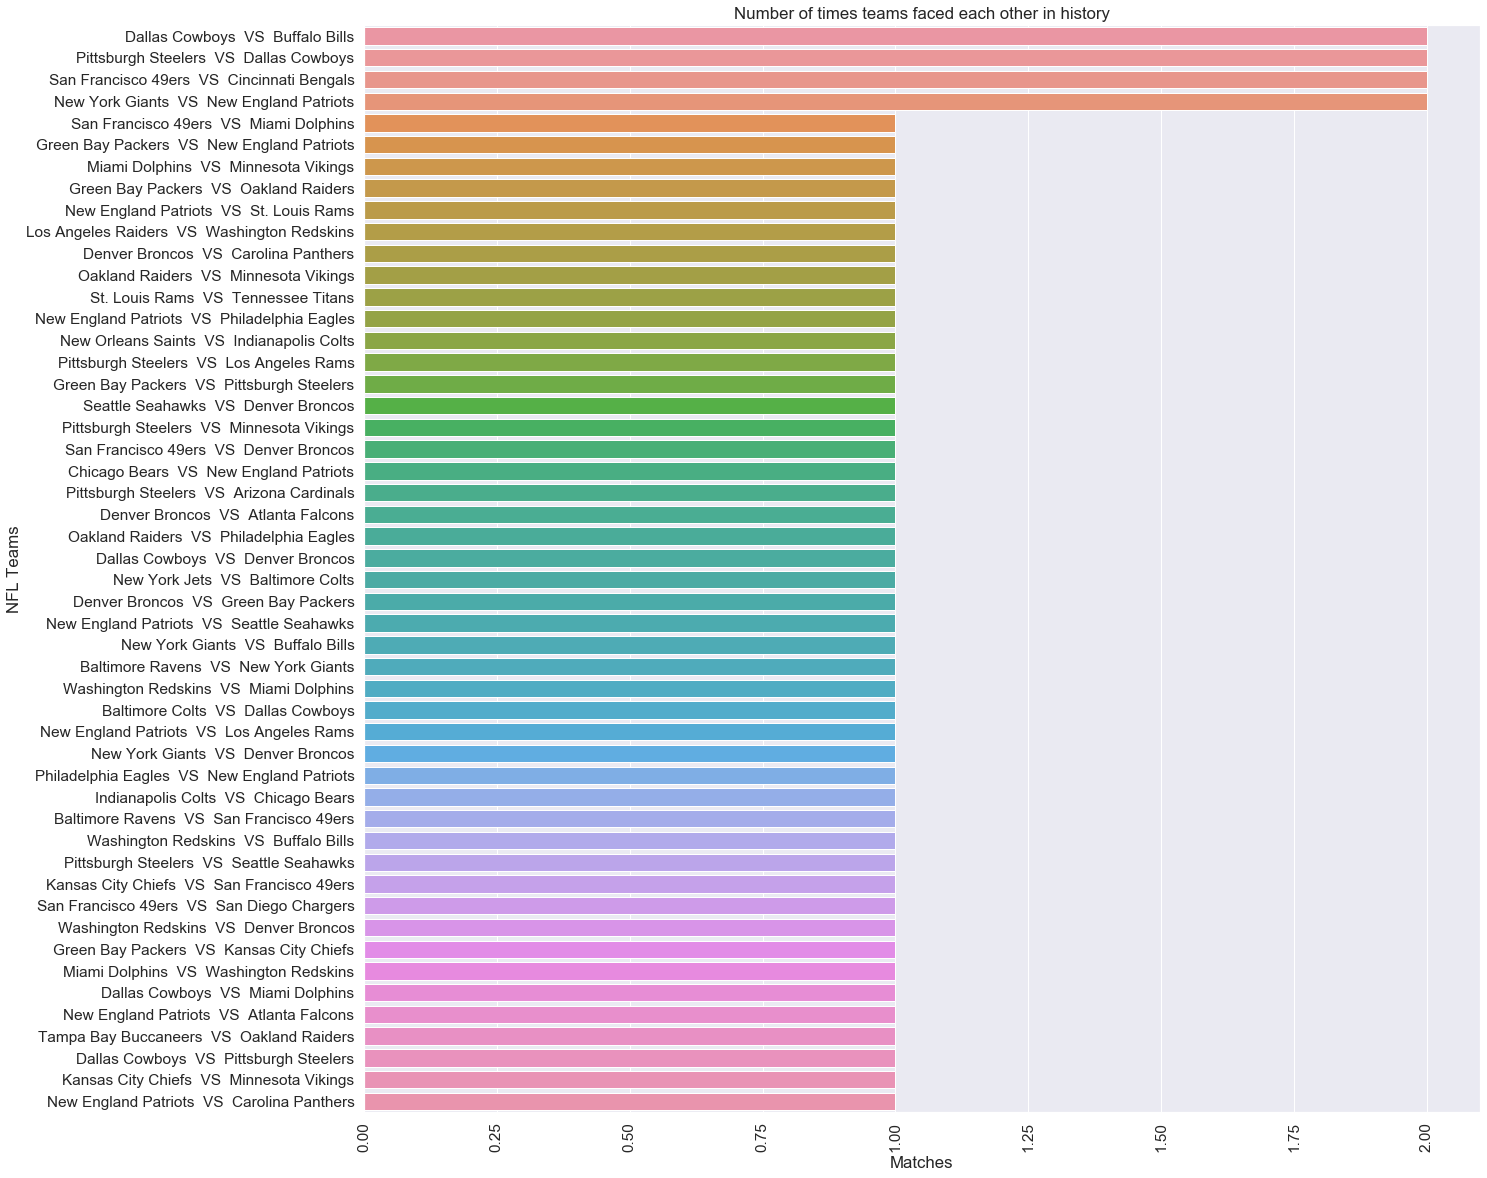

In [5]:
sns.set(font_scale=1.4)
nfl_data['Win_vs_lost'] = nfl_data['Winner'] +"  VS  " + nfl_data['Loser'] 
plt.figure(figsize=(20,20))
plt.xticks( rotation=90)

sns.countplot(y="Win_vs_lost",data=nfl_data,orient='h',order=nfl_data['Win_vs_lost'].value_counts().sort_values(ascending=False).index)
sns.set_style("whitegrid")


plt.title("Number of times teams faced each other in history") 
plt.xlabel("Matches") 
plt.ylabel("NFL Teams") 
plt.show()

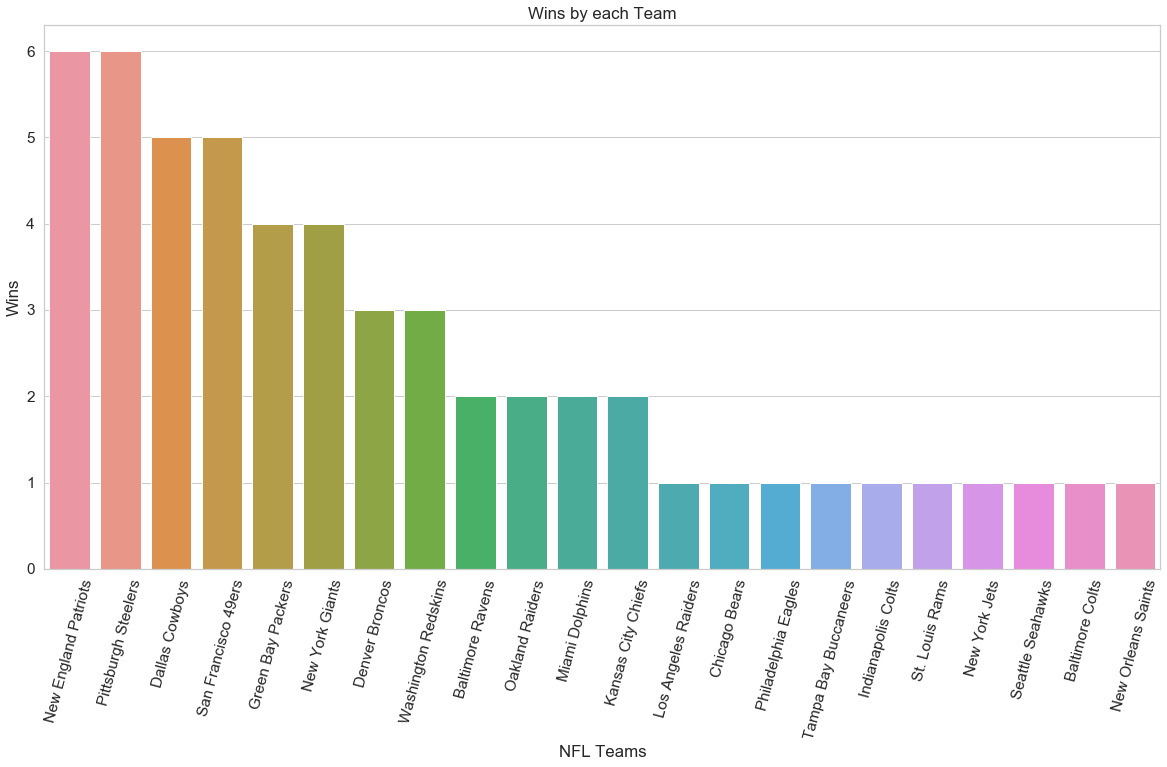

In [6]:
plt.figure(figsize=(20,10))
plt.xticks( rotation=75)
sns.countplot(x="Winner",data=nfl_data,order=nfl_data['Winner'].value_counts().sort_values(ascending=False).index)
sns.set_style("whitegrid")
plt.title("Wins by each Team") 
plt.ylabel("Wins") 
plt.xlabel("NFL Teams") 
plt.show()

Text(0.5, 0, 'Game Years')

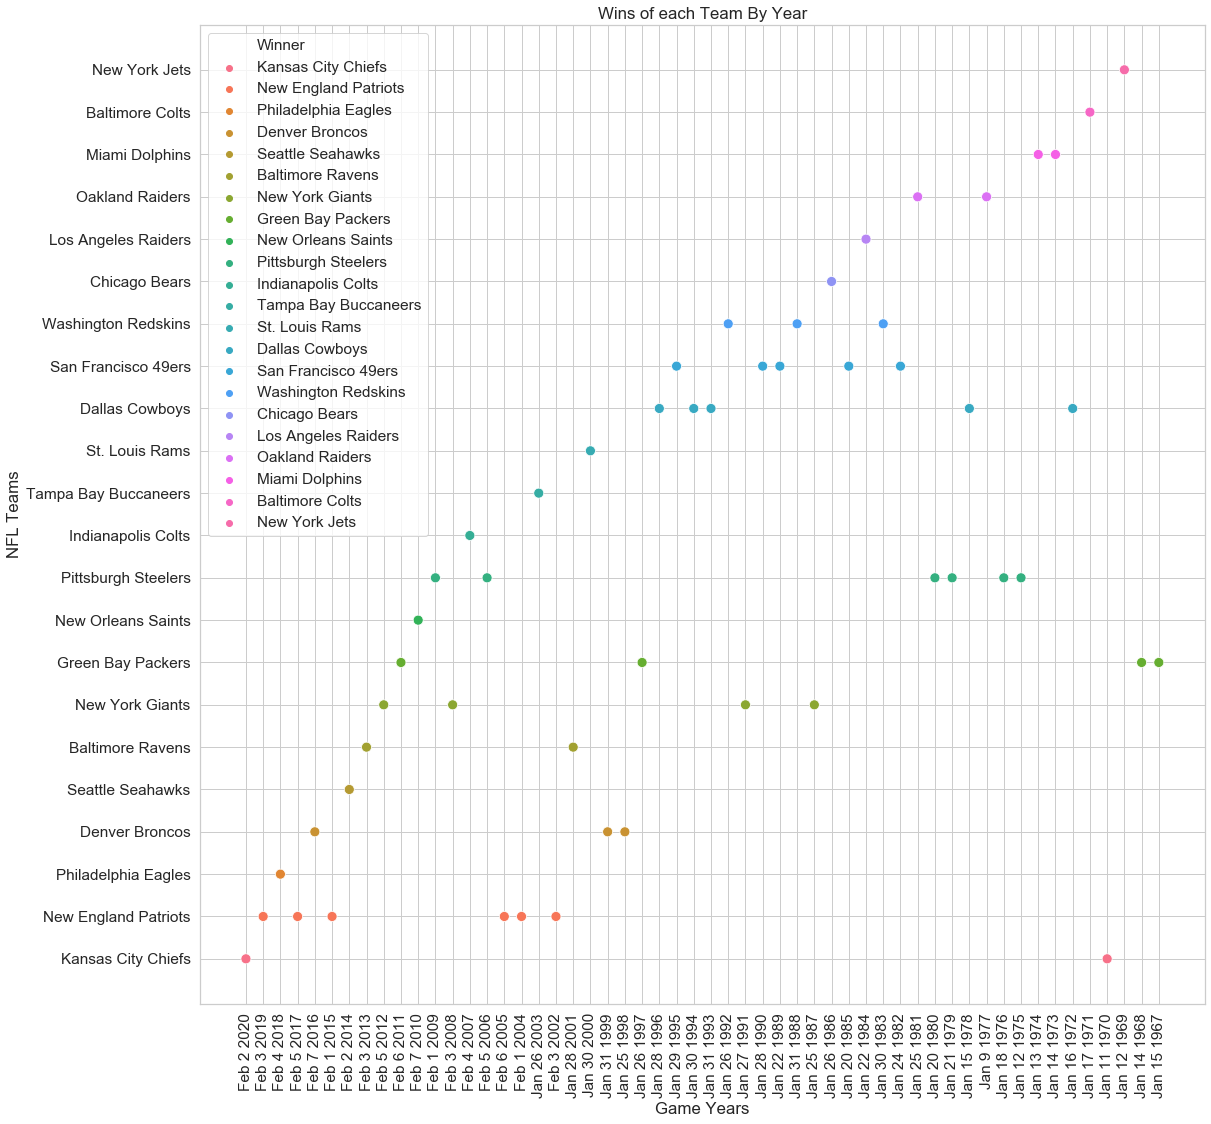

In [7]:
plt.figure(figsize=(18,18))
plt.xticks( rotation=90)
sns.scatterplot(x=nfl_data['Date'],y=nfl_data['Winner'],hue=nfl_data['Winner'],s=100)
sns.set_style("whitegrid")
plt.title("Wins of each Team By Year") 
plt.ylabel("NFL Teams") 
plt.xlabel("Game Years") 

In [8]:
rb1=nfl_data.Loser.value_counts()
rbg1=rb1.reset_index()
rbg1.rename(columns={'index':'Team' , 'Loser': 'num of lost games'}, inplace=True)
import plotly.express as px
fig = px.line(rbg1, x="Team", y="num of lost games", title='Lost matches by each team')
fig.update_xaxes(tickangle=270)
fig.show()

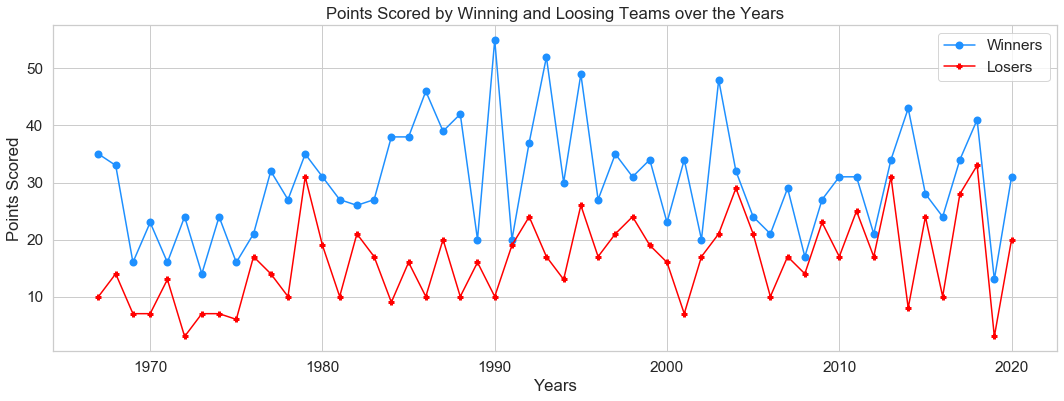

In [9]:
fig, ax = plt.subplots(figsize=(18,6))
ax.plot(nfl_data['Year'], nfl_data['Winner Pts'], marker='.', mew=5, color='dodgerblue', label='Winners')
ax.plot(nfl_data['Year'],nfl_data['Loser Pts'], marker='+', color='red', label='Losers', mew=3)
ax.set_xlabel('Years')
ax.set_ylabel('Points Scored')
ax.set_title('Points Scored by Winning and Loosing Teams over the Years')
ax.legend()
plt.show()

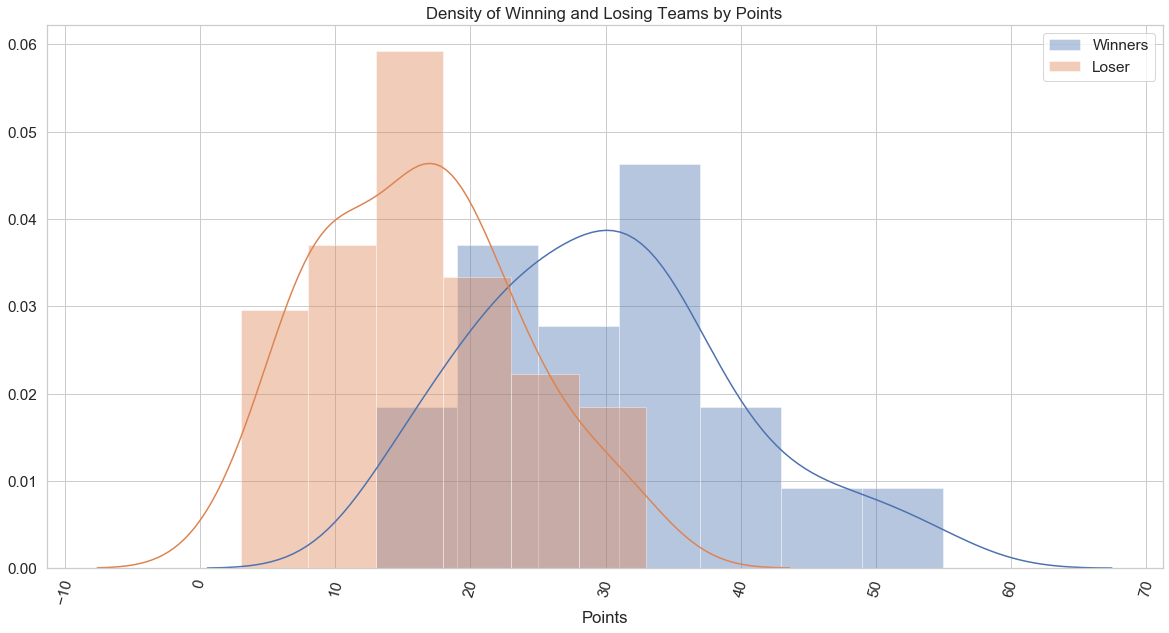

In [10]:
plt.figure(figsize=(20,10))
plt.xticks( rotation=75)
sns.set_style("white")

sns.distplot(a=nfl_data['Winner Pts'], label="Winners")
sns.distplot(a=nfl_data['Loser Pts'], label="Loser")
plt.xlabel("Points") 
plt.title("Density of Winning and Losing Teams by Points")
plt.legend()

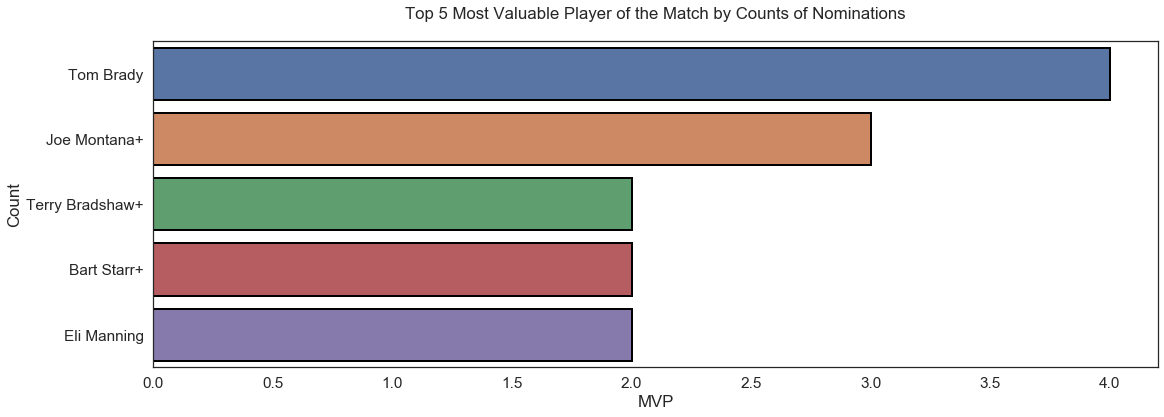

In [11]:
mvp_count = pd.DataFrame(nfl_data['MVP'].value_counts()).reset_index()
mvp_count.index += 1
mvp_count.rename(columns = {
    'index':'MVP',
    'MVP':'Count'
}, inplace=True)

mvp_count.sort_values(by='Count', ascending=False, inplace=True)
mvp_count = mvp_count.head()
plt.figure(figsize=(18,6))
g = sns.barplot(y='MVP', x='Count', data=mvp_count, edgecolor='black',linewidth=2)
g.set_title('Top 5 Most Valuable Player of the Match by Counts of Nominations', y=1.05)
g.set(xlabel='MVP', ylabel='Count')
plt.show()